***   (44100, 2)


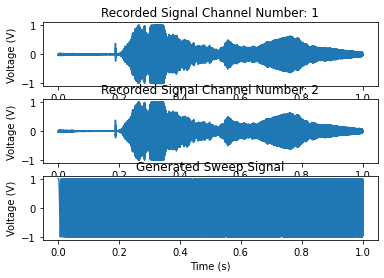

In [285]:
import numpy as np
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import sounddevice as sd


volume = 0.5     # range [0.0, 1.0]
fs = 44100       # sampling rate, Hz, must be integer
duration = 1.0   # in seconds, may be float
f = 1440.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
t = np.linspace(0, duration, int(np.floor(duration*fs)))
x1 = 1*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html
x2 = chirp(t, f0=0, f1=20000, t1=duration, method='linear')
myarray = x2

sd.default.samplerate = fs
sd.default.channels = 2

# sd.query_device( default_low_input_latency= 0.09,
#                  default_low_output_latency= 0.09,
#                  default_high_input_latency= 0.18,
#                  default_high_output_latency= 0.18,)

sd.default.latency = ('low', 'low')


myrecording = sd.playrec(myarray, fs, dtype='float32')
sd.wait()
sd.stop()



print('***  ', np.shape(myrecording))



plt.figure()
for i in range(myrecording.shape[1]):
    plt.subplot(3,1,i+1)
    plt.plot(t, myrecording[:,i]) 
    plt.title('Recorded Signal Channel Number: {channelNo}'.format(channelNo = i+1))
    plt.ylabel('Voltage (V)')
    plt.xlabel('Time (s)')

plt.subplot(3,1,3)
plt.plot(t, myarray)
plt.title('Generated Sweep Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

# plt.figure()
# plt.plot(t, x1)
# plt.show()


# sd.play(myrecording, fs)
# sd.wait()
# sd.stop()

In [286]:
sd.play(myrecording, fs)
sd.wait()
sd.stop()

In [287]:
dt = 1/fs # delta t
N = len(myrecording) # number of freq. bins
freq = (1/(dt*N))*np.arange(N/2)



xfft = np.fft.fft(myarray, N)
yfft = np.fft.fft(myrecording[:,1], N)

In [288]:
print('x',np.shape(myarray),'x fft: ',np.shape(xfft))
print('y',np.shape(myrecording),'y fft: ',np.shape(yfft))
print(np.shape(freq))

x (44100,) x fft:  (44100,)
y (44100, 2) y fft:  (44100,)
(22050,)


In [289]:
xfft2 = xfft[0:int(np.floor(len(xfft)/2))]
xfft2[1:-1] = (1/N)*2*xfft2[1:-1]
print(np.shape(xfft2))
yfft2 = yfft[0:int(np.floor(len(yfft)/2))]
yfft2[1:-1] = (1/N)*2*yfft2[1:-1]
yfft2[0] = 0
xfft2[0] = 0
print(np.shape(yfft2))

(22050,)
(22050,)


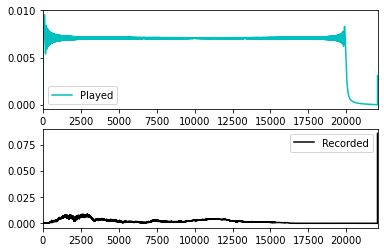

In [290]:

# plt.subplot(2,1,1)
# plt.plot(freq, np.abs(xfft), color='c', linewidth=1.5, label='Played')
# plt.subplot(2,1,2)
# plt.plot(freq,np.abs(yfft), color='k', linewidth=2, label='Recorded')
# plt.show()



fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(freq, np.abs(xfft2), color='c', linewidth=1.5, label='Played')
plt.xlim(freq[0], freq[-1])
plt.legend()
plt.sca(axs[1])
plt.plot(freq, np.abs(yfft2), color='k', linewidth=1.5, label='Recorded')
plt.xlim(freq[0], freq[-1])
plt.legend()
plt.show()



In [292]:
a = [1, 2, 3, 4, 5, 6]

In [293]:
a

[1, 2, 3, 4, 5, 6]

In [297]:
a[-4:]

[3, 4, 5, 6]

In [298]:
np.pi

3.141592653589793